<a href="https://colab.research.google.com/github/IreneWanjiruKariuki/NetflixTitles-DataCleaning/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving Mall_Customers.csv to Mall_Customers (1).csv


**Q2-Clean data and carry out Exploratory Data Analysis**

---



question 3b


Data Understanding

---



In [26]:
#1. Data Understanding

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [29]:
#Retrieve descriptive statistics about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
#Get the shape of the dataset-number of rows and columns
df.shape

(200, 5)

In [31]:
#Describe the columns in the dataset.
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [32]:
#How many unique values are there in the dataset
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Cleaning Data

---



In [33]:
#Cleaning data:
#Step 1- view number and names of columns, number of rows, number of non-null rows per column and column datatype
df.info()
#No missing values were found in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Exploratory Data Analysis

---



In [34]:
#Exploratory Data Analysis
#Relationship Analysis

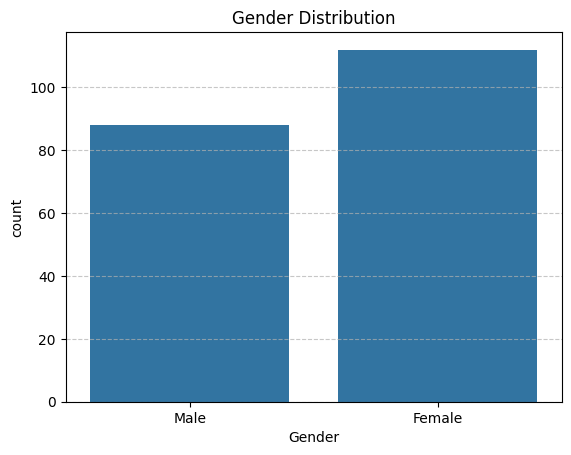

In [35]:
#1. Gender distribution:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#There are more female shoppers in the mall than male shoppers.

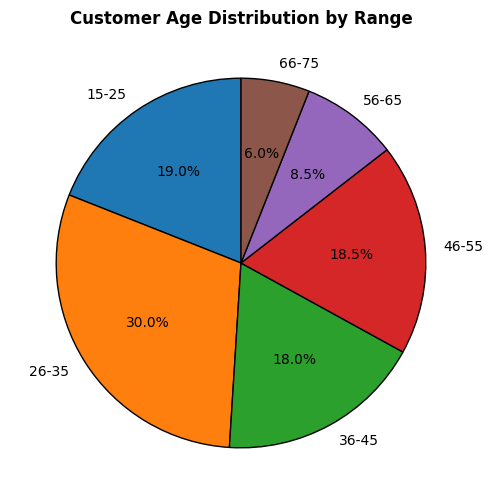

In [36]:
#2. Age distribution:

bins = [15,25,35,45,55,65,75]
labels = ['15-25','26-35','36-45','46-55','56-65','66-75']
age_groups_temp = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
age_counts = age_groups_temp.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.title('Customer Age Distribution by Range', fontsize=12, fontweight='bold')
plt.show()

#Most customers are between 25–45 years old, indicating a relatively young customer base.


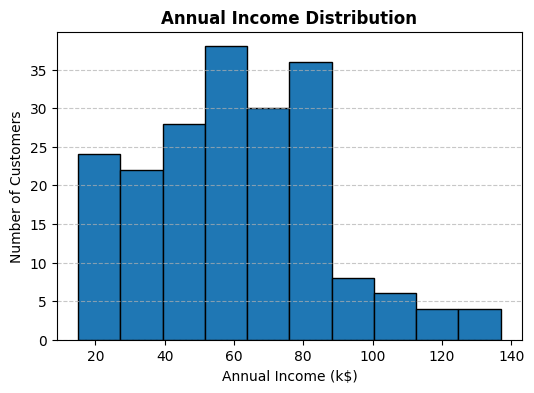

In [37]:
#3. Annual Income Distribution:

plt.figure(figsize=(6,4))
plt.hist(df['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Annual Income Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most customers earn between 40k and 80k per year, meaning the mall attracts mainly middle-income customers.


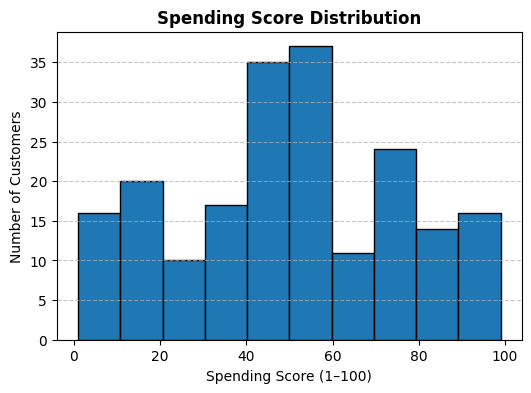

In [38]:
#4. Spending Score Distribution:

plt.figure(figsize=(6,4))
plt.hist(df['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Spending Score Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Spending Score (1–100)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Spending scores vary widely from 1 to 100, and the mean therefore customers have very different spending behaviors.



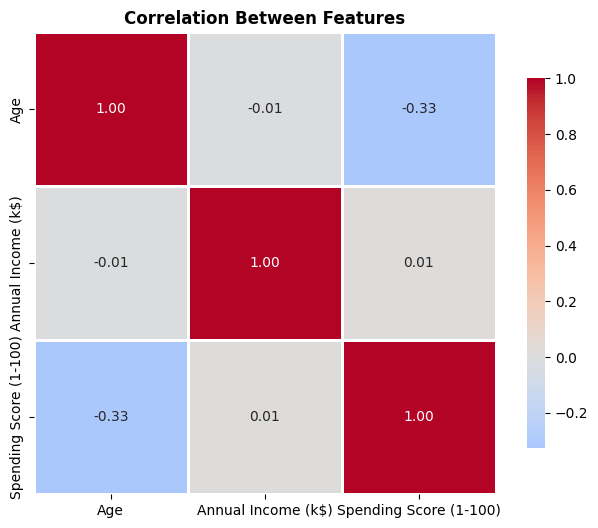

In [39]:
#5. Correlation Matrix:
numerical_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Features', fontsize=12, fontweight='bold')
plt.show()

#Annual Income and Spending Score have virtually no correlation (0.01), meaning a customer's income does not predict their spending behavior.
#This independence makes them ideal for 2D clustering.
#Additionally, Age shows weak negative correlation with Spending Score (-0.33), suggesting younger customers tend to spend slightly more, but this relationship is not strong enough to be the primary clustering basis.

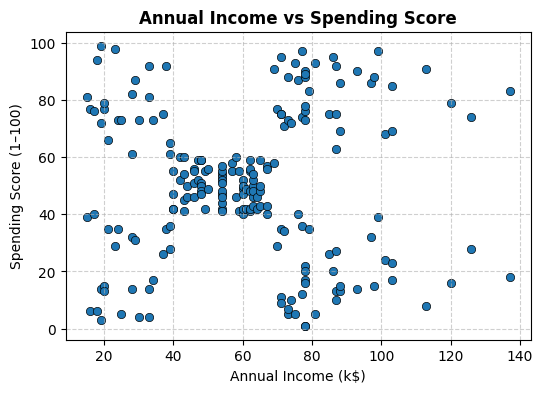

In [40]:
#6. Annual Income vs Spending Score:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=df, edgecolor='black')
plt.title('Annual Income vs Spending Score', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Customers with similar income show very different spending scores.

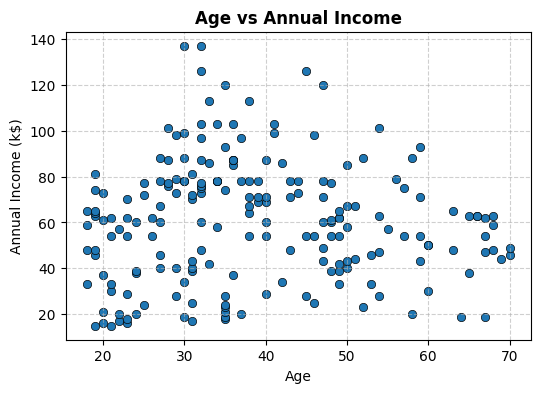

In [41]:
#7. Age vs Annual Income
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, edgecolor='black')
plt.title('Age vs Annual Income', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Income varies across all age groups with no strong pattern.

3a. K-Means with 1 Feature (Annual Income)

Data Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Selected Feature:
   Annual Income (k$)
0                  15
1                  15
2                  16
3                  16
4                  17


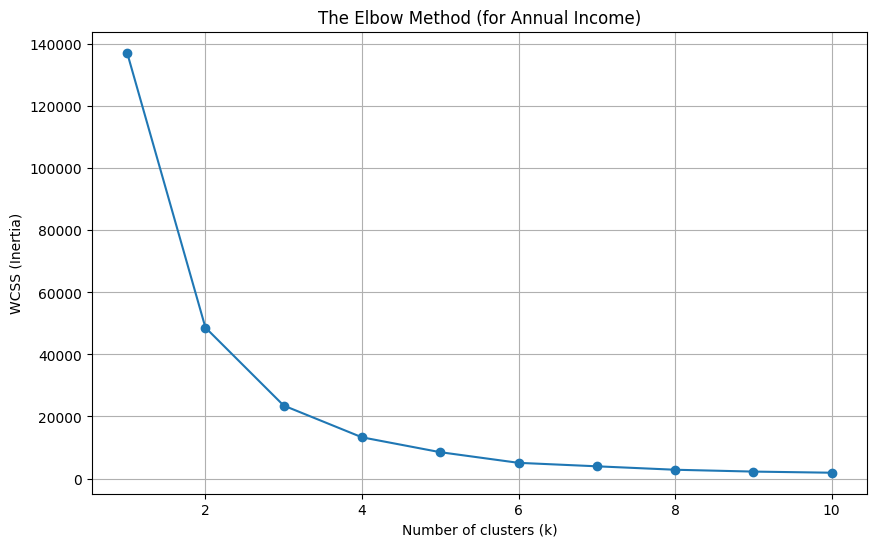

In [42]:
# We select 'Annual Income (k$)' as our single feature.
X = df[['Annual Income (k$)']]

print("Data Head:")
print(df.head())
print("\nSelected Feature:")
print(X.head())

#Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('The Elbow Method (for Annual Income)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


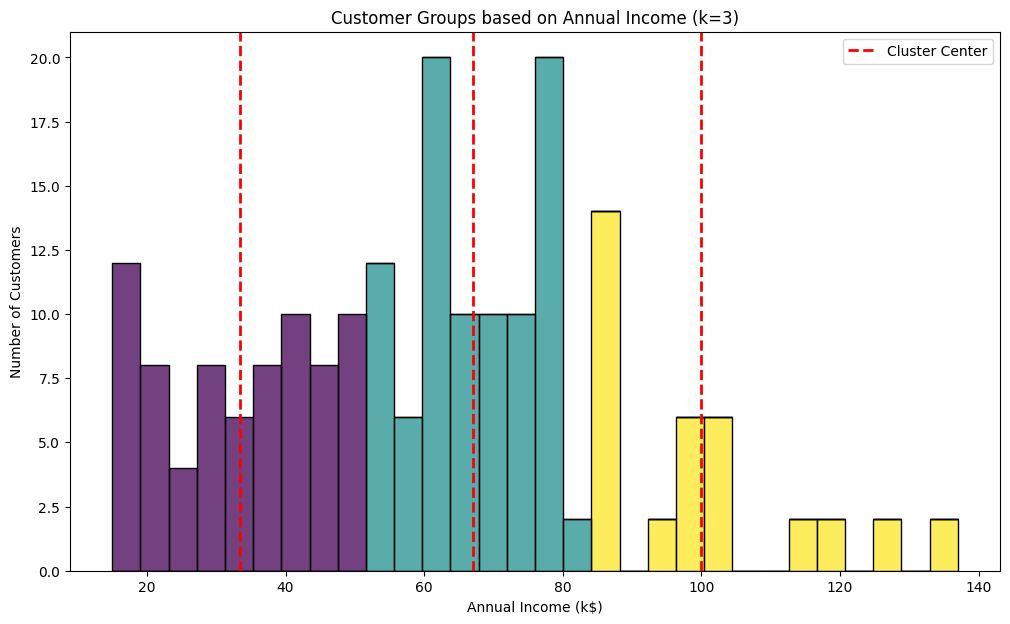

In [43]:
chosen_k = 3
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Income Cluster'] = y_kmeans

plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Annual Income (k$)', hue='Income Cluster',
             palette='viridis', multiple='stack', bins=30)

centers = kmeans.cluster_centers_
for center in centers:
    plt.axvline(x=center[0], color='red', linestyle='--', linewidth=2,
                label='Cluster Center' if 'Cluster Center' not in plt.gca().get_legend_handles_labels()[1] else '')

plt.title('Customer Groups based on Annual Income (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


3b.  K-Means with 2 Feature (Annual Income)

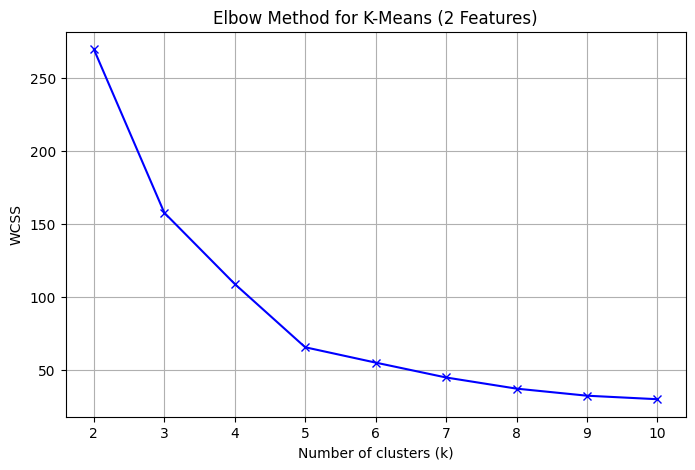

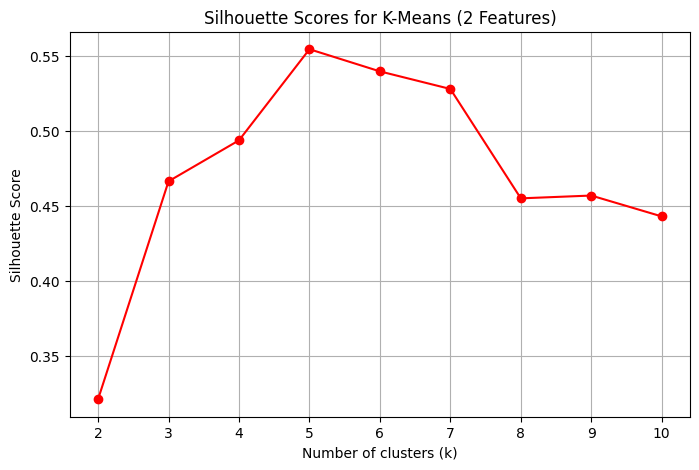

In [44]:
#Features: Annual Income (k$) and Spending Score (1–100)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bx-')
plt.title('Elbow Method for K-Means (2 Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#Silhouette Scores
sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'ro-')
plt.title('Silhouette Scores for K-Means (2 Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


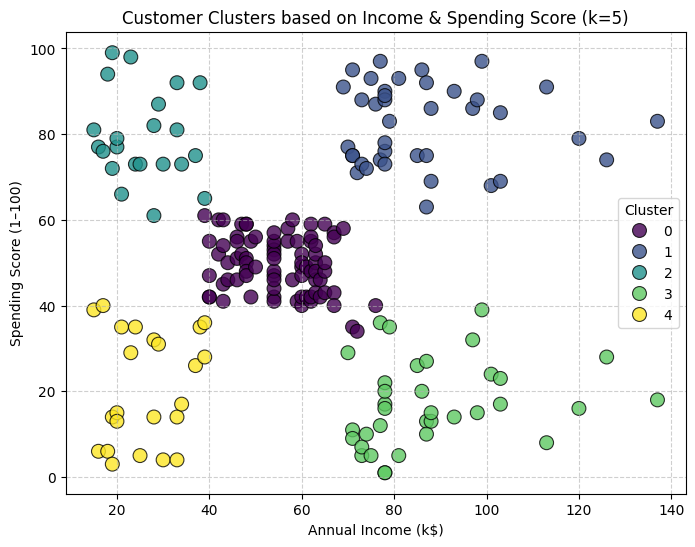

In [45]:
# Based on Elbow and Silhouette, choose k = 5 (best cluster separation)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='black'
)
plt.title(f'Customer Clusters based on Income & Spending Score (k={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



**4. Visualization and comparison of clustering in 3(a) and 3(b)**

**4.1 Comparison of cluster shapes and distributions**

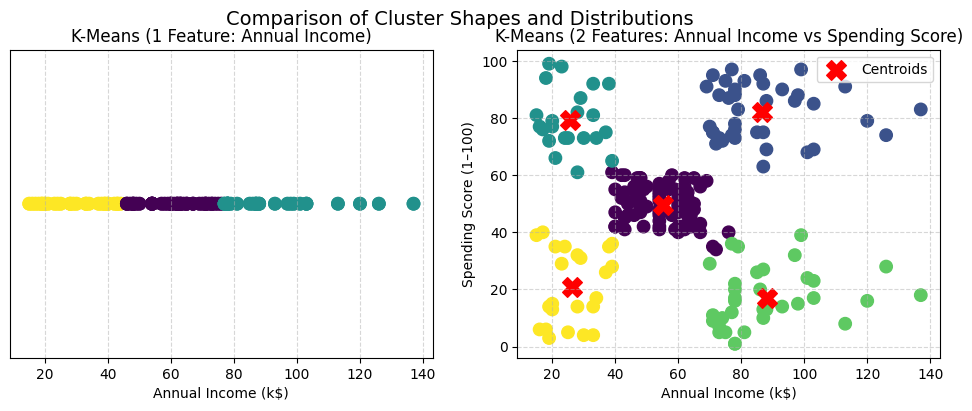

In [47]:
#Extracting the relevant features
X1 = df[['Annual Income (k$)']].values #Using 1 feature
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values #Using 2 features

#K-Means Clustering
kmeans_1d = KMeans(n_clusters=3, random_state=42)
clusters_1d = kmeans_1d.fit_predict(X1)

kmeans_2d = KMeans(n_clusters=5, random_state=42)
clusters_2d = kmeans_2d.fit_predict(X2)

#Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#1 feature Clustering (Annual Income)
axes[0].scatter(X1, [0]*len(X1), c=clusters_1d, cmap='viridis', s=80)
axes[0].set_title("K-Means (1 Feature: Annual Income)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_yticks([])
axes[0].grid(True, linestyle='--', alpha=0.5)

#2 feature Clustering (Annual Income + Spending Score)
axes[1].scatter(X2[:, 0], X2[:, 1], c=clusters_2d, cmap='viridis', s=80)
axes[1].scatter(kmeans_2d.cluster_centers_[:, 0],
                kmeans_2d.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[1].set_title("K-Means (2 Features: Annual Income vs Spending Score)")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1–100)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Comparison of Cluster Shapes and Distributions", fontsize=14)
plt.show()

In the left plot (1 feature), each customer is grouped only by their annual income level hence the clusters appear as segments aling the annual income axis. This makes people witth similar income levels fall into the same cluster regardless of the other behavioral differences.

In the right plot (2 features), each customer is grouped by both their annual income and spendind score. The algorith identifies the clusters based on both features forming circular regions. This make the clusters to be more meaningful which help us to idenify certain patterns.

**4.2 Dimentional relations**

When clustering is based only on Annual Income, K-Means groups customers purely by income levels, forming simple linear segments that ignore behavioral differences. However, when Spending Score is added as a second feature, the algorithm captures the relationship between income and spending habits, producing more meaningful and realistic clusters. The two feature model distinguishes, for example, high-income low spenders from high income high spenders, which the one feature model cannot do. This added feature reveals hidden patterns, enhances cluster separation, and provides a deeper understanding of customer behavior beyond income alone.

**4.3 Separation Quality (Silhouette Sccores)**

In [46]:
#Transforming the features to the same scale
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

#Calculating the silhouette scores
sil_1d = silhouette_score(X1_scaled, kmeans_1d.labels_)
sil_2d = silhouette_score(X2_scaled, kmeans_2d.labels_)

print("Silhouette (1 Feature):", sil_1d)
print("Silhouette (2 Features):", sil_2d)

Silhouette (1 Feature): 0.5188101430914764
Silhouette (2 Features): 0.5546571631111091


When clustering customers using Annual Income only, the silhouette score tends to be lower, indicating that the clusters are less distinct and may overlap since income alone cannot fully explain customer behavior. However, when Spending Score is added as a second feature, the silhouette score usually increases, showing that clusters become more compact and well separated. This means that including both income and spending behavior gives a more meaningful segmentation of customers, revealing clearer patterns that reflect real differences in their purchasing habits and financial profiles.